# Problem 7, Parts (f)-(h): Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 7 parts (f)-(h) by filling in the sections marked `# TODO` and running all cells.

In [1]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 7(f): Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 7(c)-(e). Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [2]:
import numpy as np

def loss(X, Y, w):
    N = X.shape[0]
    predictions = X.dot(w)
    loss = np.sum((Y - predictions) ** 2) / N
    return loss

def gradient(x, y, w):
    grad = -2 * (y - x.dot(w)) * x
    return grad

def SGD(X, Y, w_start, eta, N_epochs):
    W = np.zeros((2, len(w_start)))  # 第一行存初始权重，第二行存最终权重
    losses = np.zeros(N_epochs)
    w = w_start.copy()
    W[0, :] = w

    for epoch in range(N_epochs):
        # Shuffle the data
        permutation = np.random.permutation(X.shape[0])
        X_shuffled = X[permutation]
        Y_shuffled = Y[permutation]
        
        for i in range(X.shape[0]):
            # Compute the gradient for one data point
            grad = gradient(X_shuffled[i], Y_shuffled[i], w)
            # Update the weights
            w -= eta * grad

        losses[epoch] = loss(X, Y, w)

    W[1, :] = w
    
    return W, losses


Next, we need to load the dataset. In doing so, the following function may be helpful:

In [3]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: GeneratorExitiven as a string.
    
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in `sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [4]:
#==============================================
# TODO:
# (1) load the dataset
data = load_data("data/sgd_data.csv")
X = data[:,0:4]
y = data[:,4]
ones = np.ones((X.shape[0], 1))
x = np.hstack([X, ones])
# (2) run SGD using the given parameters
w_start = [0.001, 0.001,0.001,0.001,0.001]
eta = 10 ** -15
N_epochs = 1000
W, losses = SGD(x, y, w_start, eta, N_epochs)

# (3) print out the final weights.
print (W[0,])
print (W[1,])
#==============================================

[0.001 0.001 0.001 0.001 0.001]
[0.00099965 0.00099982 0.00099955 0.00099989 0.00099995]


## Problem7(g): Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

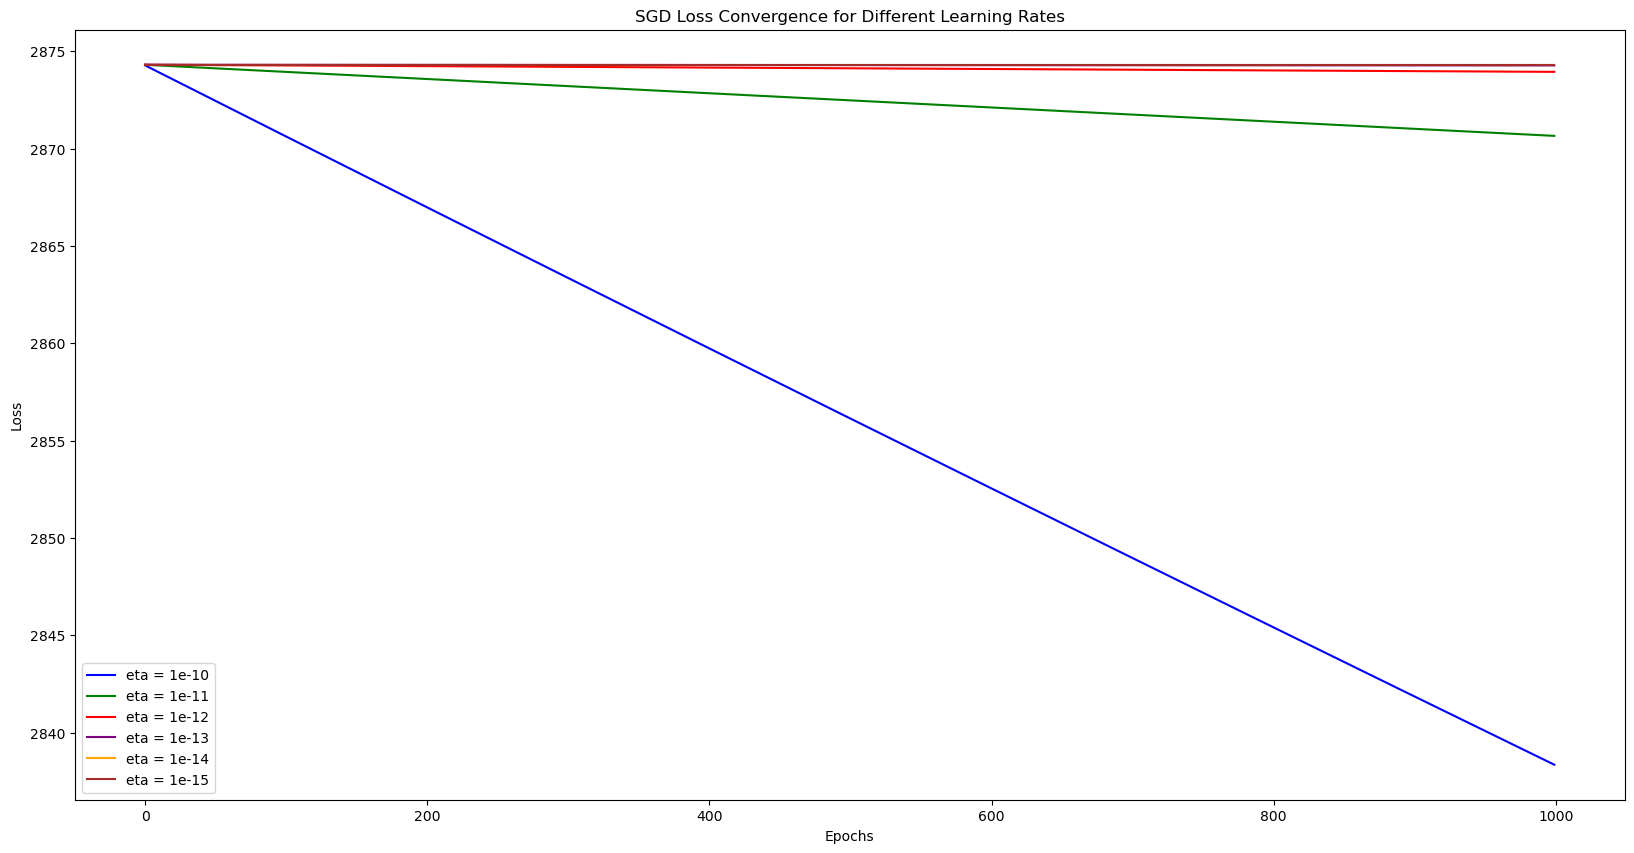

In [5]:
#==============================================
# TODO: create a plot showing the convergence
# of SGD for the different learning rates.

eta_values = [10 ** -10, 10 ** -11, 10 ** -12, 10 ** -13, 10 ** -14, 10 ** -15]
N_epochs 

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink','gray']

plt.figure(figsize=(20, 10))
w_start = [0.001, 0.001,0.001,0.001,0.001]
N_epochs = 1000

for i, eta in enumerate(eta_values):

    _, losses = SGD(x, y, w_start, eta, N_epochs)
    

    plt.plot(losses, color=colors[i % len(colors)], label=f'eta = {eta}')


plt.title('SGD Loss Convergence for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#==============================================

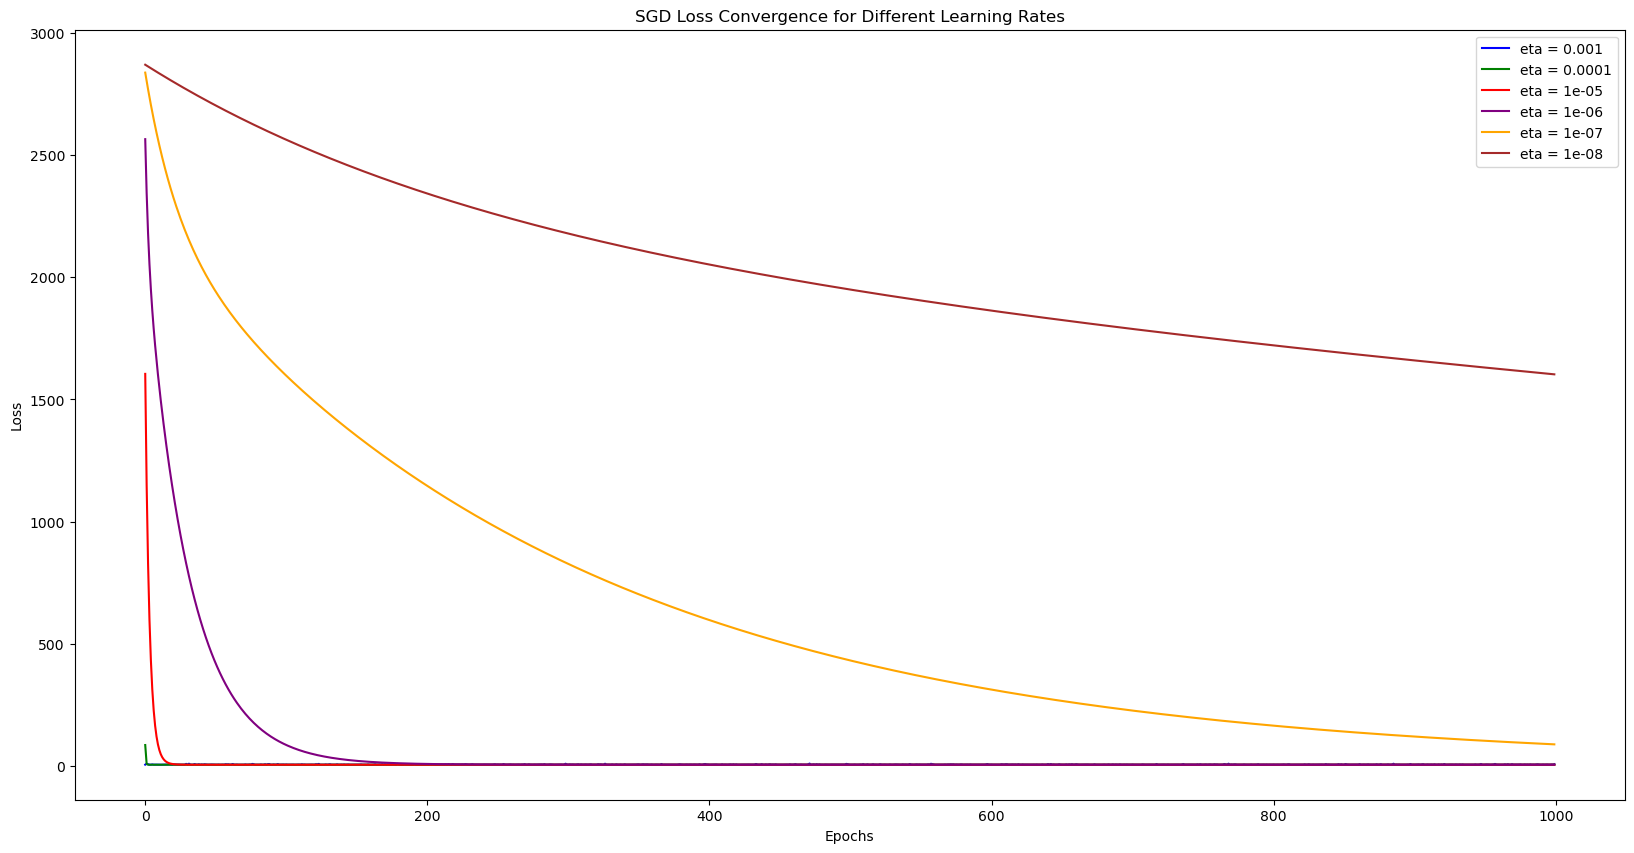

In [6]:
#==============================================
# TODO: create a plot showing the convergence
# of SGD for the different learning rates.

eta_values = [10 ** -3, 10 ** -4, 10 ** -5, 10 ** -6, 10 ** -7, 10 ** -8]
N_epochs 

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink','gray']

plt.figure(figsize=(20, 10))
w_start = [0.001, 0.001,0.001,0.001,0.001]
N_epochs = 1000

for i, eta in enumerate(eta_values):

    _, losses = SGD(x, y, w_start, eta, N_epochs)
    

    plt.plot(losses, color=colors[i % len(colors)], label=f'eta = {eta}')


plt.title('SGD Loss Convergence for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#==============================================

## Problem 7(h)

Provide your code for computing the least-squares analytical solution below.

In [10]:
#==============================================
# TODO: implement the least-squares
# analytical solution.

def compute_weights(X, Y):
    

    
    # 计算 Σ(x_i * x_i^T)
    sum_xxT = np.dot(X.T, X)
    
    # 计算 Σ(x_i * y_i)
    sum_xy = np.dot(X.T, Y)
    
    # 计算 (Σ(x_i * x_i^T)) 的逆
    inv_sum_xxT = np.linalg.inv(sum_xxT)
    
    # 计算权重向量 w
    w = np.dot(inv_sum_xxT, sum_xy)
    
    return w


# 计算权重向量 w
w = compute_weights(x, y)

print(w)
print(loss(x, y, w_start))
print(loss(x, y, w))
#==============================================

[ -5.99157048   4.01509955 -11.93325972   8.99061096  -0.31644251]
2874.307793616544
4.071140386809385
